In [3]:
%matplotlib ipympl
import numpy as np
from pathlib import Path
import utils as utils
import harp
import pandas as pd
import matplotlib.pyplot as plt
import aeon.io.video as video

In [4]:
root = Path('C:/Users/neurogears/source/repos/swc/hypnose/example_data/2025-01-29T14-50-54/2025-01-29T14-50-54')

metadata_reader = utils.SessionData()
session_settings = utils.load_json(metadata_reader, root/"SessionSettings")
print(session_settings.iloc[0]['metadata'].sequences)

[DotMap(rewardCondition1=[[{'command': 'OdorA', 'rewarded': True}]], rewardCondition2=[[{'command': 'OdorE', 'rewarded': True}]], enableTrialIndicator=True, presentationTime=0.8, interCommand='Purge', interCommandTime=0.2, repeatCount=20, maximumTime=1.0, responseTime=99999.0, resetOnReward=True, interTrialInterval=0.0, name='FreeRun', defaultCommand='Default', enableRewardLocationIndicator=True)]


In [ ]:
# Load relevant data streams
behavior_reader = harp.create_reader('device_schemas/behavior.yml', epoch=harp.REFERENCE_EPOCH)
olfactometer_reader = harp.create_reader('device_schemas/olfactometer.yml', epoch=harp.REFERENCE_EPOCH)
video_reader = utils.Video()
video_data = utils.load_video(video_reader, root/"VideoData")

digital_input_data = utils.load(behavior_reader.DigitalInputState, root/"Behavior")
output_set = utils.load(behavior_reader.OutputSet, root/"Behavior")
output_clear = utils.load(behavior_reader.OutputClear, root/"Behavior")
olfactometer_valves_0 = utils.load(olfactometer_reader.OdorValveState, root/"Olfactometer0")
olfactometer_valves_1 = utils.load(olfactometer_reader.OdorValveState, root/"Olfactometer1")
olfactometer_end_0 = utils.load(olfactometer_reader.EndValveState, root/"Olfactometer0")
analog_data = utils.load(behavior_reader.AnalogData, root/"Behavior")
flow_meter = utils.load(olfactometer_reader.Flowmeter, root/"Olfactometer0")
print(flow_meter)

                            AnalogInput0  Encoder  AnalogInput1
Time                                                           
1904-01-01 21:17:57.438976             6        0             4
1904-01-01 21:17:57.440000             5        0             4
1904-01-01 21:17:57.440992             6        0             3
1904-01-01 21:17:57.441984             4        0             4
1904-01-01 21:17:57.442976             4        0             3
...                                  ...      ...           ...
1904-01-02 09:45:38.794976             3        0             4
1904-01-02 09:45:38.796000             3        0             6
1904-01-02 09:45:38.796992             5        0             4
1904-01-02 09:45:38.797984             4        0             5
1904-01-02 09:45:38.798976             5        0             3

[44861360 rows x 3 columns]


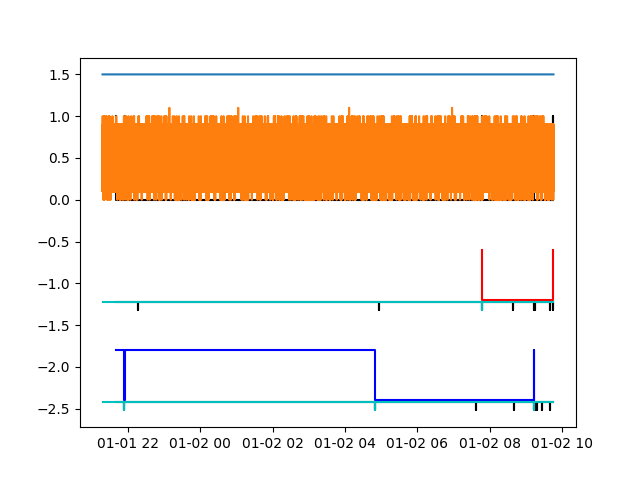

In [27]:
# find initiation onsets, reward pokes
initiating_events = digital_input_data['DIPort0'][digital_input_data['DIPort0'] == True]
r1_led = utils.concat_digi_events(output_clear['DOPort1'], output_set['DOPort1'])
r2_led = utils.concat_digi_events(output_clear['DOPort2'], output_set['DOPort2'])

plt.figure()
plt.step(digital_input_data.index, digital_input_data['DIPort0'] * 1, where='post', c='k')

plt.step(r1_led.index, r1_led * 0.6 - 1.2, where='post', c='r')
plt.step(digital_input_data.index, digital_input_data['DIPort1'] * -0.1 - 1.22, where='post', c='k')
plt.step(output_set.index, output_set["SupplyPort1"] * -0.1 - 1.22, where='post', c='c')

plt.step(r2_led.index, r2_led * 0.6 - 2.4, where='post', c='b')
plt.step(digital_input_data.index, digital_input_data['DIPort2'] * -0.1 - 2.42, where='post', c='k')
plt.step(output_set.index, output_set["SupplyPort2"] * -0.1 - 2.42, where='post', c='c')

plt.plot(video_data.index, np.ones((len(video_data.index), 1)) + 0.5)
plt.plot(analog_data.index, analog_data['AnalogInput0'] * 0.1)

15


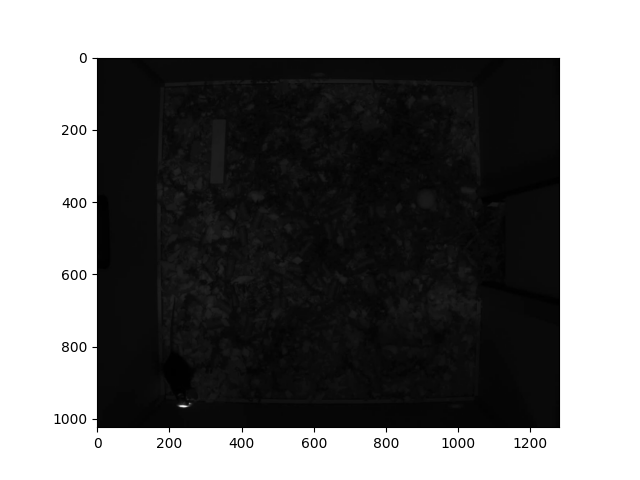

In [23]:
# look at final video frames
tstamp = analog_data.index[-1]
event_window = video_data[(tstamp - pd.Timedelta(seconds=1)) : tstamp]
event_frames = [f for f in video.frames(event_window)]
print(len(event_frames))

plt.figure()
plt.imshow(event_frames[13])